In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline


In [45]:

diabetes = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
# diabetes['Diabetes_012'] = diabetes['Diabetes_012'].replace(2, 1)
diabetes.head()
print(diabetes['Diabetes_012'].value_counts())


0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


In [37]:

x_train, x_test = train_test_split(diabetes, test_size=0.20, random_state=42)
x_test,y_test = x_test.drop(['Diabetes_012'],axis=1),x_test['Diabetes_012']

# x_train, x_val = train_test_split(x_train, test_size=0.20, random_state=42)

x_train,y_train = x_train.drop(['Diabetes_012'],axis=1),x_train['Diabetes_012']
# x_val,y_val = x_val.drop(['Diabetes_012'],axis=1),x_val['Diabetes_012']


In [38]:

logistic = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

param_grid = [
    {
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__solver': ['liblinear', 'saga']
    },
    {
        'model__penalty': ['l2', 'l1'],
        'model__C': [0.01, 0.1, 1.0, 10.0],
        'model__class_weight': ['balanced'],
        'model__solver': ['liblinear', 'saga']
    }
]

# Grid search
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Best params: {'model__C': 0.001, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.001, penalty='l1', solver='saga'))])
Best score: 0.8460856190806595


Training Accuracy: 84.61%
Test Accuracy: 84.84%


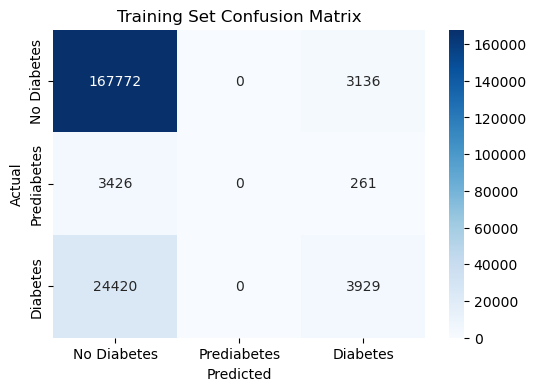

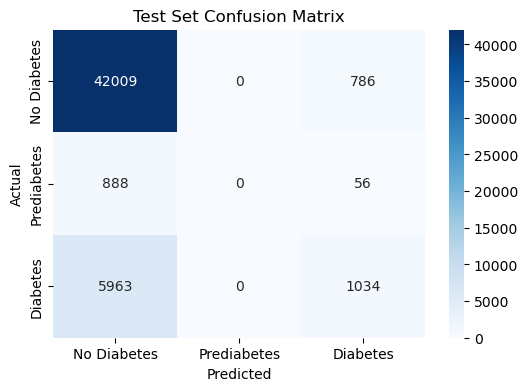


Classification Report (Test Set):
              precision    recall  f1-score   support

 No Diabetes       0.86      0.98      0.92     42795
 Prediabetes       0.00      0.00      0.00       944
    Diabetes       0.55      0.15      0.23      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.38     50736
weighted avg       0.80      0.85      0.81     50736



c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
model_all_features = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.001, penalty='l1', solver='saga'))
])

# model_all_features = LogisticRegression(C=0.01, penalty='l1', solver='saga')
model_all_features.fit(x_train, y_train)

# Get predictions
y_train_pred = model_all_features.predict(x_train)
y_test_pred = model_all_features.predict(x_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Create confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot all confusion matrices
plot_confusion_matrix(y_train, y_train_pred, "Training Set Confusion Matrix")
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

# Bonus: Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,target_names=['No Diabetes', 'Prediabetes', 'Diabetes']))

In [54]:
print("Training set distribution:\n", y_train.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())

Training set distribution:
 0.0    170908
2.0     28349
1.0      3687
Name: Diabetes_012, dtype: int64

Test set distribution:
 0.0    42795
2.0     6997
1.0      944
Name: Diabetes_012, dtype: int64


In [40]:

selector = SelectKBest(f_classif, k=10) 
X_new = selector.fit_transform(x_train, y_train)

selected_features = x_train.columns[selector.get_support()]
print("Best features:", selected_features)

Best features: Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
X_train_selected = selector.transform(x_train)
X_test_selected = selector.transform(x_test)

model_selected_features = LogisticRegression(random_state=42, penalty='l1', C=0.01, solver='saga')
model_selected_features.fit(X_train_selected, y_train)

# Get predictions
y_train_pred = model_selected_features.predict(X_train_selected)
y_test_pred = model_selected_features.predict(X_test_selected)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%") 
print(f"Test Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 84.57%
Validation Accuracy: 84.80%
Test Accuracy: 84.75%


c:\Users\LENOVE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
